In [1]:
import lxml.html
import lxml.etree

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_file(filename):
    doc=lxml.html.parse(filename)
    table=doc.findall('//table')[0]
    rows=table.findall('./tr')
    num_rows=len(rows)
    data=np.zeros((num_rows,1+10+39), dtype=np.int64)
    for i,row in enumerate(rows):
        data[i,0]=int(row.xpath('./td/b')[0].text)
        data[i,1:]=[int(x.text) for x in row.xpath('./td')[1:-1]]
    return data

In [4]:
regions=[]
for i in range(11,227):
    try:
        region = parse_file('raw/{}.html'.format(i))
        print ("Done region", i)
    except:
        print ("Skipping region", i)
    regions.append(region)
all_data=np.concatenate(regions)

Done region 11
Done region 12
Done region 13
Done region 14
Done region 15
Done region 16
Done region 17
Done region 18
Done region 19
Done region 20
Done region 21
Done region 22
Done region 23
Done region 24
Done region 25
Done region 26
Done region 27
Done region 28
Done region 29
Done region 30
Done region 31
Done region 32
Done region 33
Done region 34
Done region 35
Done region 36
Done region 37
Done region 38
Done region 39
Done region 40
Skipping region 41
Skipping region 42
Skipping region 43
Skipping region 44
Done region 45
Done region 46
Done region 47
Done region 48
Done region 49
Done region 50
Done region 51
Done region 52
Skipping region 53
Skipping region 54
Skipping region 55
Skipping region 56
Done region 57
Done region 58
Done region 59
Done region 60
Skipping region 61
Done region 62
Done region 63
Done region 64
Done region 65
Done region 66
Done region 67
Done region 68
Done region 69
Done region 70
Done region 71
Done region 72
Done region 73
Done region 74
Done

Raw verification

In [21]:
print(all_data.shape)
np.sum(all_data[:,1:], axis=0)

(30554, 50)


array([31365465, 30920991,   700787, 11935372, 18823882,   606472,
       19430380,     3109, 19429308,   231536,    33735,    27863,
          34995,    19451,  2354016,    23125,     6087,   844660,
           5942,  1316269,     4746,    19688,     9939,  5896750,
          15756,    16080,     6060,     4549,   307278,     9130,
           4729,    20768,  1035247,    13776,    43577,     2694,
           5694,     3309,    16136,  3091630,     5683,    15399,
        1156328,     5453,    20195,  2554899,   118885,    18819,   108130])

There are a few cells without voters; filter them out

In [13]:
have_votes=np.where(all_data[:,9]>0)
print (len(have_votes[0]))


30552


array([31365465, 30920991,   700787, 11935372, 18823882,   606472,
       19430380,     3109, 19429308,   231536,    33735,    27863,
          34995,    19451,  2354016,    23125,     6087,   844660,
           5942,  1316269,     4746,    19688,     9939,  5896750,
          15756,    16080,     6060,     4549,   307278,     9130,
           4729,    20768,  1035247,    13776,    43577,     2694,
           5694,     3309,    16136,  3091630,     5683,    15399,
        1156328,     5453,    20195,  2554899,   118885,    18819,   108130])

In [14]:
VOTED=all_data[have_votes,9].flatten()
Z=all_data[have_votes,24].flatten()
P=all_data[have_votes,40].flatten()
T=all_data[have_votes,46].flatten()

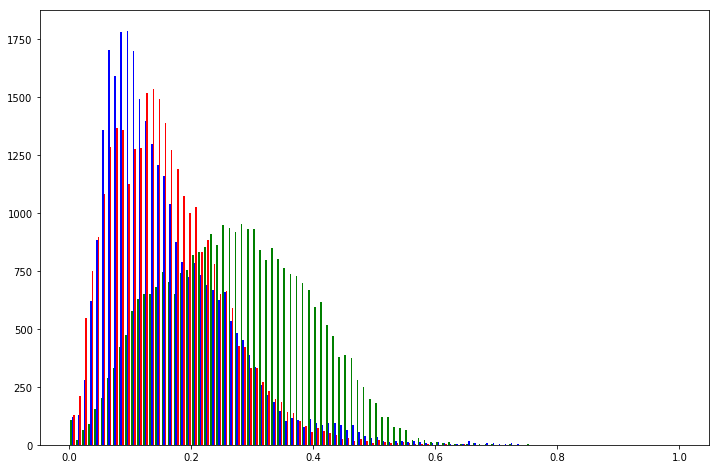

In [15]:
plt.figure(figsize=(12, 8))
plt.hist([Z/VOTED, P/VOTED, T/VOTED], bins=100, range=(0,1),
         color=['g','b','r'], label=['Z','P','T'],
        );

Looks like beta distribution, let's fit

In [16]:
from scipy.stats import beta

In [17]:
def make_beta(d):
    a,b = beta.fit(np.extract(np.logical_and(0<d, d<1), d), floc=0,fscale=1)[:2]
    return a,b

In [22]:
aZ,bZ=make_beta(Z/VOTED)
print(aZ,bZ, aZ/(aZ+bZ))
aP,bP=make_beta(P/VOTED)
print(aP,bP, aP/(aP+bP))
aT,bT=make_beta(T/VOTED)
print(aT,bT, aT/(aT+bT))

3.39102451888 9.02577698457 0.273099680134
2.28390713861 11.9786810518 0.160132726833
2.53652398444 13.4294501713 0.158870605683


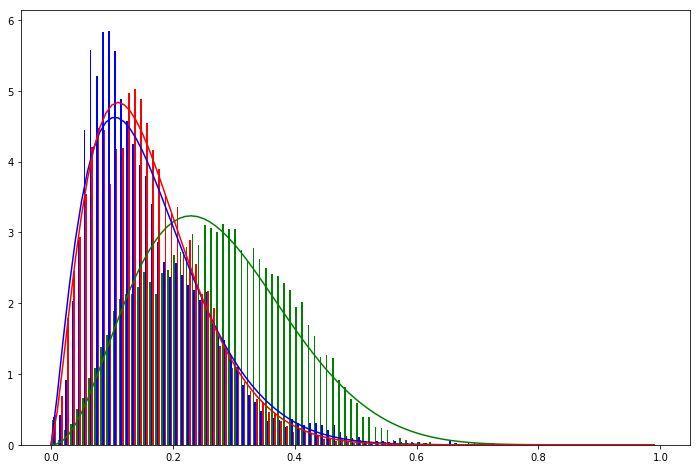

In [19]:
xs=np.arange(0,1,0.01)
plt.figure(figsize=(12, 8))
plt.hist([Z/VOTED, P/VOTED, T/VOTED], bins=100, range=(0,1), normed=True,
         color=['g','b','r'], label=['Z','P','T'],
        )
plt.plot(xs, beta.pdf(xs,aZ,bZ), 'g',
         xs, beta.pdf(xs,aP,bP), 'b',
         xs, beta.pdf(xs,aT,bT), 'r');